In [ ]:
import pandas as pd

In [ ]:
exp1 = pd.read_csv("Data/exp1.csv")
exp1 = exp1.drop("Unnamed: 0", axis=1)
exp2 = pd.read_csv("Data/exp2.csv")
exp2 = exp2.drop("Unnamed: 0", axis=1)

/tmp/ipykernel_181569/1566420057.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exp1 = pd.read_csv("Data/exp1.csv")
/tmp/ipykernel_181569/1566420057.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exp2 = pd.read_csv("Data/exp2.csv")


In [ ]:
exp1 = exp1.drop(["CellType","Replicate", "Event","FSC-A","SSC-A"], axis=1)
exp2 = exp2.drop(["CellType","Replicate","Event","FSC-A","SSC-A"], axis=1)

In [ ]:
exp1 = exp1.fillna("null")
exp2 = exp2.fillna("null")

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

class CustomLabelEncoder(LabelEncoder):
    def __init__(self, custom_mapping=None, handle_unknown='ignore'):
        super().__init__()
        self.custom_mapping = custom_mapping
        self.handle_unknown = handle_unknown

    def fit(self, y):
        if self.custom_mapping:
            self.classes_ = np.array(list(self.custom_mapping.keys()))
            self.custom_mapping = {k: v for v, k in enumerate(self.classes_)}
        else:
            super().fit(y)
        return self

    def transform(self, y):
        if self.custom_mapping:
            return np.array([self.custom_mapping.get(item, -1 if self.handle_unknown == 'ignore' else self.custom_mapping[item]) for item in y])
        else:
            return super().transform(y)

    def fit_transform(self, y):
        return self.fit(y).transform(y)

    def inverse_transform(self, y):
        if self.custom_mapping:
            inverse_mapping = {v: k for k, v in self.custom_mapping.items()}
            return np.array([inverse_mapping.get(item, 'unknown' if self.handle_unknown == 'ignore' else inverse_mapping[item]) for item in y])
        else:
            return super().inverse_transform(y)

    def decode(self, encoded_labels):
        """Decode the encoded labels back to their original form."""
        return self.inverse_transform(encoded_labels)

#labels = ['A2', 'E1', 'G4', 'N4', 'Q4', 'T4', 'V4', 'null']
custom_mapping = {'N4': 0, 'A2': 1, 'Q4': 2, 'T4':3, 'V4': 4, 'G4':5, 'E1':6, 'null':7 }

encoder = CustomLabelEncoder(custom_mapping=custom_mapping, handle_unknown='ignore')
exp1["Peptide"]=encoder.fit_transform(exp1["Peptide"])
exp2["Peptide"]=encoder.fit_transform(exp2["Peptide"])

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = exp1['Peptide'].value_counts().min()

downsampled_data = []

for label in exp1['Peptide'].unique():
    class_data = exp1[exp1['Peptide'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Peptide'].value_counts())
exp1 = downsampled_data
exp1["Peptide"].value_counts()

Peptide
0    247641
1    247641
2    247641
3    247641
4    247641
5    247641
6    247641
7    247641
Name: count, dtype: int64


Peptide
0    247641
1    247641
2    247641
3    247641
4    247641
5    247641
6    247641
7    247641
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = exp2['Peptide'].value_counts().min()

downsampled_data = []

for label in exp2['Peptide'].unique():
    class_data = exp2[exp2['Peptide'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Peptide'].value_counts())
exp2 = downsampled_data
exp2["Peptide"].value_counts()

Peptide
0    291473
1    291473
2    291473
3    291473
4    291473
5    291473
6    291473
7    291473
Name: count, dtype: int64


Peptide
0    291473
1    291473
2    291473
3    291473
4    291473
5    291473
6    291473
7    291473
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

exp1_scaled = pd.DataFrame(scaler.fit_transform(exp1.drop(["Peptide","Concentration","Time"], axis=1)), columns=exp1.drop(["Peptide","Concentration","Time"], axis=1).columns)
exp1_scaled

exp2_scaled = pd.DataFrame(scaler.fit_transform(exp2.drop(["Peptide", "Concentration","Time"], axis=1)), columns=exp2.drop(["Peptide", "Concentration","Time"], axis=1).columns)
exp2_scaled

CD25      CD38  Granzyme B       CD2      CD27    CD45RA  \
0        0.293692  0.310615    0.318449  0.349744  0.271750  0.349934   
1        0.299897  0.321788    0.329025  0.318974  0.273705  0.414155   
2        0.322647  0.279330    0.384254  0.251282  0.442815  0.397117   
3        0.605998  0.277095    0.499412  0.502564  0.304008  0.511140   
4        0.520165  0.300559    0.334900  0.339487  0.262952  0.349934   
...           ...       ...         ...       ...       ...       ...   
2331779  0.283351  0.308380    0.333725  0.243077  0.267840  0.401048   
2331780  0.309204  0.282682    0.345476  0.295385  0.268817  0.366972   
2331781  0.284385  0.319553    0.629847  0.214359  0.266862  0.348624   
2331782  0.280248  0.316201    0.365452  0.365128  0.271750  0.372215   
2331783  0.288521  0.315084    0.370153  0.291282  0.278592  0.368283   

              CD4      CD86     CXCR6       CD5  ...     CD126  Proliferation  \
0        0.331325  0.255132  0.276637  0.478006  ...  0.308943       0.506091   
1        0.327711  0.296188  0.270772  0.615836  ...  0.345528       0.120709   
2        0.336145  0.257087  0.248289  0.546432  ...  0.350610       0.799557   
3        0.315663  0.290323  0.272727  0.571848  ...  0.337398       0.524917   
4        0.322892  0.280547  0.282502  0.443793  ...  0.259146       0.283499   
...           ...       ...       ...       ...  ...       ...            ...   
2331779  0.328916  0.268817  0.292278  0.408602  ...  0.292683       0.799557   
2331780  0.309639  0.256109  0.312805  0.365591  ...  0.304878       0.799557   
2331781  0.319277  0.280547  0.369501  0.150538  ...  0.288618       0.755260   
2331782  0.332530  0.264907  0.329423  0.388074  ...  0.293699       0.756368   
2331783  0.344578  0.276637  0.287390  0.313783  ...  0.295732       0.832780   

             ICOS      IRF8      CD19    MHC-II      CD45      CD44    CX3CR1  \
0        0.262262  0.300098  0.338147  0.335578  0.506586  0.317907  0.338727   
1        0.610611  0.248289  0.344164  0.126824  0.643364  0.318913  0.326861   
2        0.362362  0.333333  0.329723  0.277217  0.679838  0.228370  0.567422   
3        0.710711  0.342131  0.430806  0.023569  0.643364  0.249497  0.606257   
4        0.516517  0.287390  0.332130  0.429854  0.476190  0.325956  0.333333   
...           ...       ...       ...       ...       ...       ...       ...   
2331779  0.295295  0.275660  0.336943  0.285073  0.508612  0.266600  0.346278   
2331780  0.292292  0.276637  0.333333  0.261504  0.525836  0.260563  0.379720   
2331781  0.275275  0.439883  0.350181  0.308642  0.531915  0.280684  0.422869   
2331782  0.334334  0.277615  0.321300  0.299663  0.603850  0.302817  0.366775   
2331783  0.359359  0.321603  0.309266  0.246914  0.361702  0.375252  0.464941   

             CD8a  
0        0.495601  
1        0.652004  
2        0.475073  
3        0.637341  
4        0.496579  
...           ...  
2331779  0.314761  
2331780  0.292278  
2331781  0.305963  
2331782  0.558162  
2331783  0.269795  

[2331784 rows x 24 columns]

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

2024-08-22 00:09:21.912078: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-22 00:09:21.912607: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 00:09:21.915142: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 00:09:21.920449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 00:09:21.928326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('autoencoder_balanced_selu.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
autoencoder.load_weights("autoencoder_balanced_selu.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
json_file = open('encoder_model_balanced_selu.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
encoder_model = model_from_json(loaded_model_json)
# load weights into new model
encoder_model.load_weights("encoder_model_balanced_selu.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
reconstructed2 = autoencoder.predict(exp2_scaled)
reconstructed_df2 = pd.DataFrame(reconstructed2)
reconstructed_df2 = reconstructed_df2.rename(columns=dict(zip(reconstructed_df2.columns, exp2_scaled.columns)))
correlation2 = exp2_scaled.corrwith(reconstructed_df2)
print(correlation2)

72869/72869 ━━━━━━━━━━━━━━━━━━━━ 32s 439us/step
CD25             0.922263
CD38             0.357665
Granzyme B       0.732306
CD2              0.863383
CD27             0.939035
CD45RA           0.675966
CD4              0.364264
CD86             0.464360
CXCR6            0.781802
CD5              0.919090
CD62L            0.791799
OX40             0.679060
PD-L1            0.743246
TBet             0.758217
CD126            0.756347
Proliferation    0.913194
ICOS             0.864796
IRF8             0.804988
CD19             0.557610
MHC-II           0.813556
CD45             0.841341
CD44             0.884106
CX3CR1           0.790147
CD8a             0.945417
dtype: float64


In [ ]:
mutual_info ={}
from sklearn.feature_selection import mutual_info_regression
for i in exp2_scaled.columns:
    mutual_info[i]=mutual_info_regression(exp2_scaled[i].to_frame(), reconstructed_df2[i].to_frame(), discrete_features=[False])

In [ ]:
latent_dim = 2
latent_space = encoder_model.predict(exp2_scaled)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

72869/72869 ━━━━━━━━━━━━━━━━━━━━ 27s 370us/step


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Layout
   .DynamicMap.I     :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD25_actual,CD25_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.II    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD38_actual,CD38_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.III   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [Granzyme B_actual,Granzyme B_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.IV    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD2_actual,CD2_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.V     :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD27_actual,CD27_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.VI    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD45RA_actual,CD45RA_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.VII   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD4_actual,CD4_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.VIII  :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD86_actual,CD86_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.IX    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CXCR6_actual,CXCR6_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.X     :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD5_actual,CD5_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XI    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD62L_actual,CD62L_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XII   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [OX40_actual,OX40_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XIII  :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [PD-L1_actual,PD-L1_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XIV   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [TBet_actual,TBet_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XV    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD126_actual,CD126_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XVI   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [Proliferation_actual,Proliferation_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XVII  :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [ICOS_actual,ICOS_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XVIII :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [IRF8_actual,IRF8_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XIX   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD19_actual,CD19_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XX    :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [MHC-II_actual,MHC-II_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XXI   :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD45_actual,CD45_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XXII  :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD44_actual,CD44_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XXIII :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CX3CR1_actual,CX3CR1_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
   .DynamicMap.XXIV  :DynamicMap   []
      :Overlay
         .RGB.I   :RGB   [CD8a_actual,CD8a_reconstructed]   (R,G,B,A)
         .Curve.I :Curve   [x]   (y)
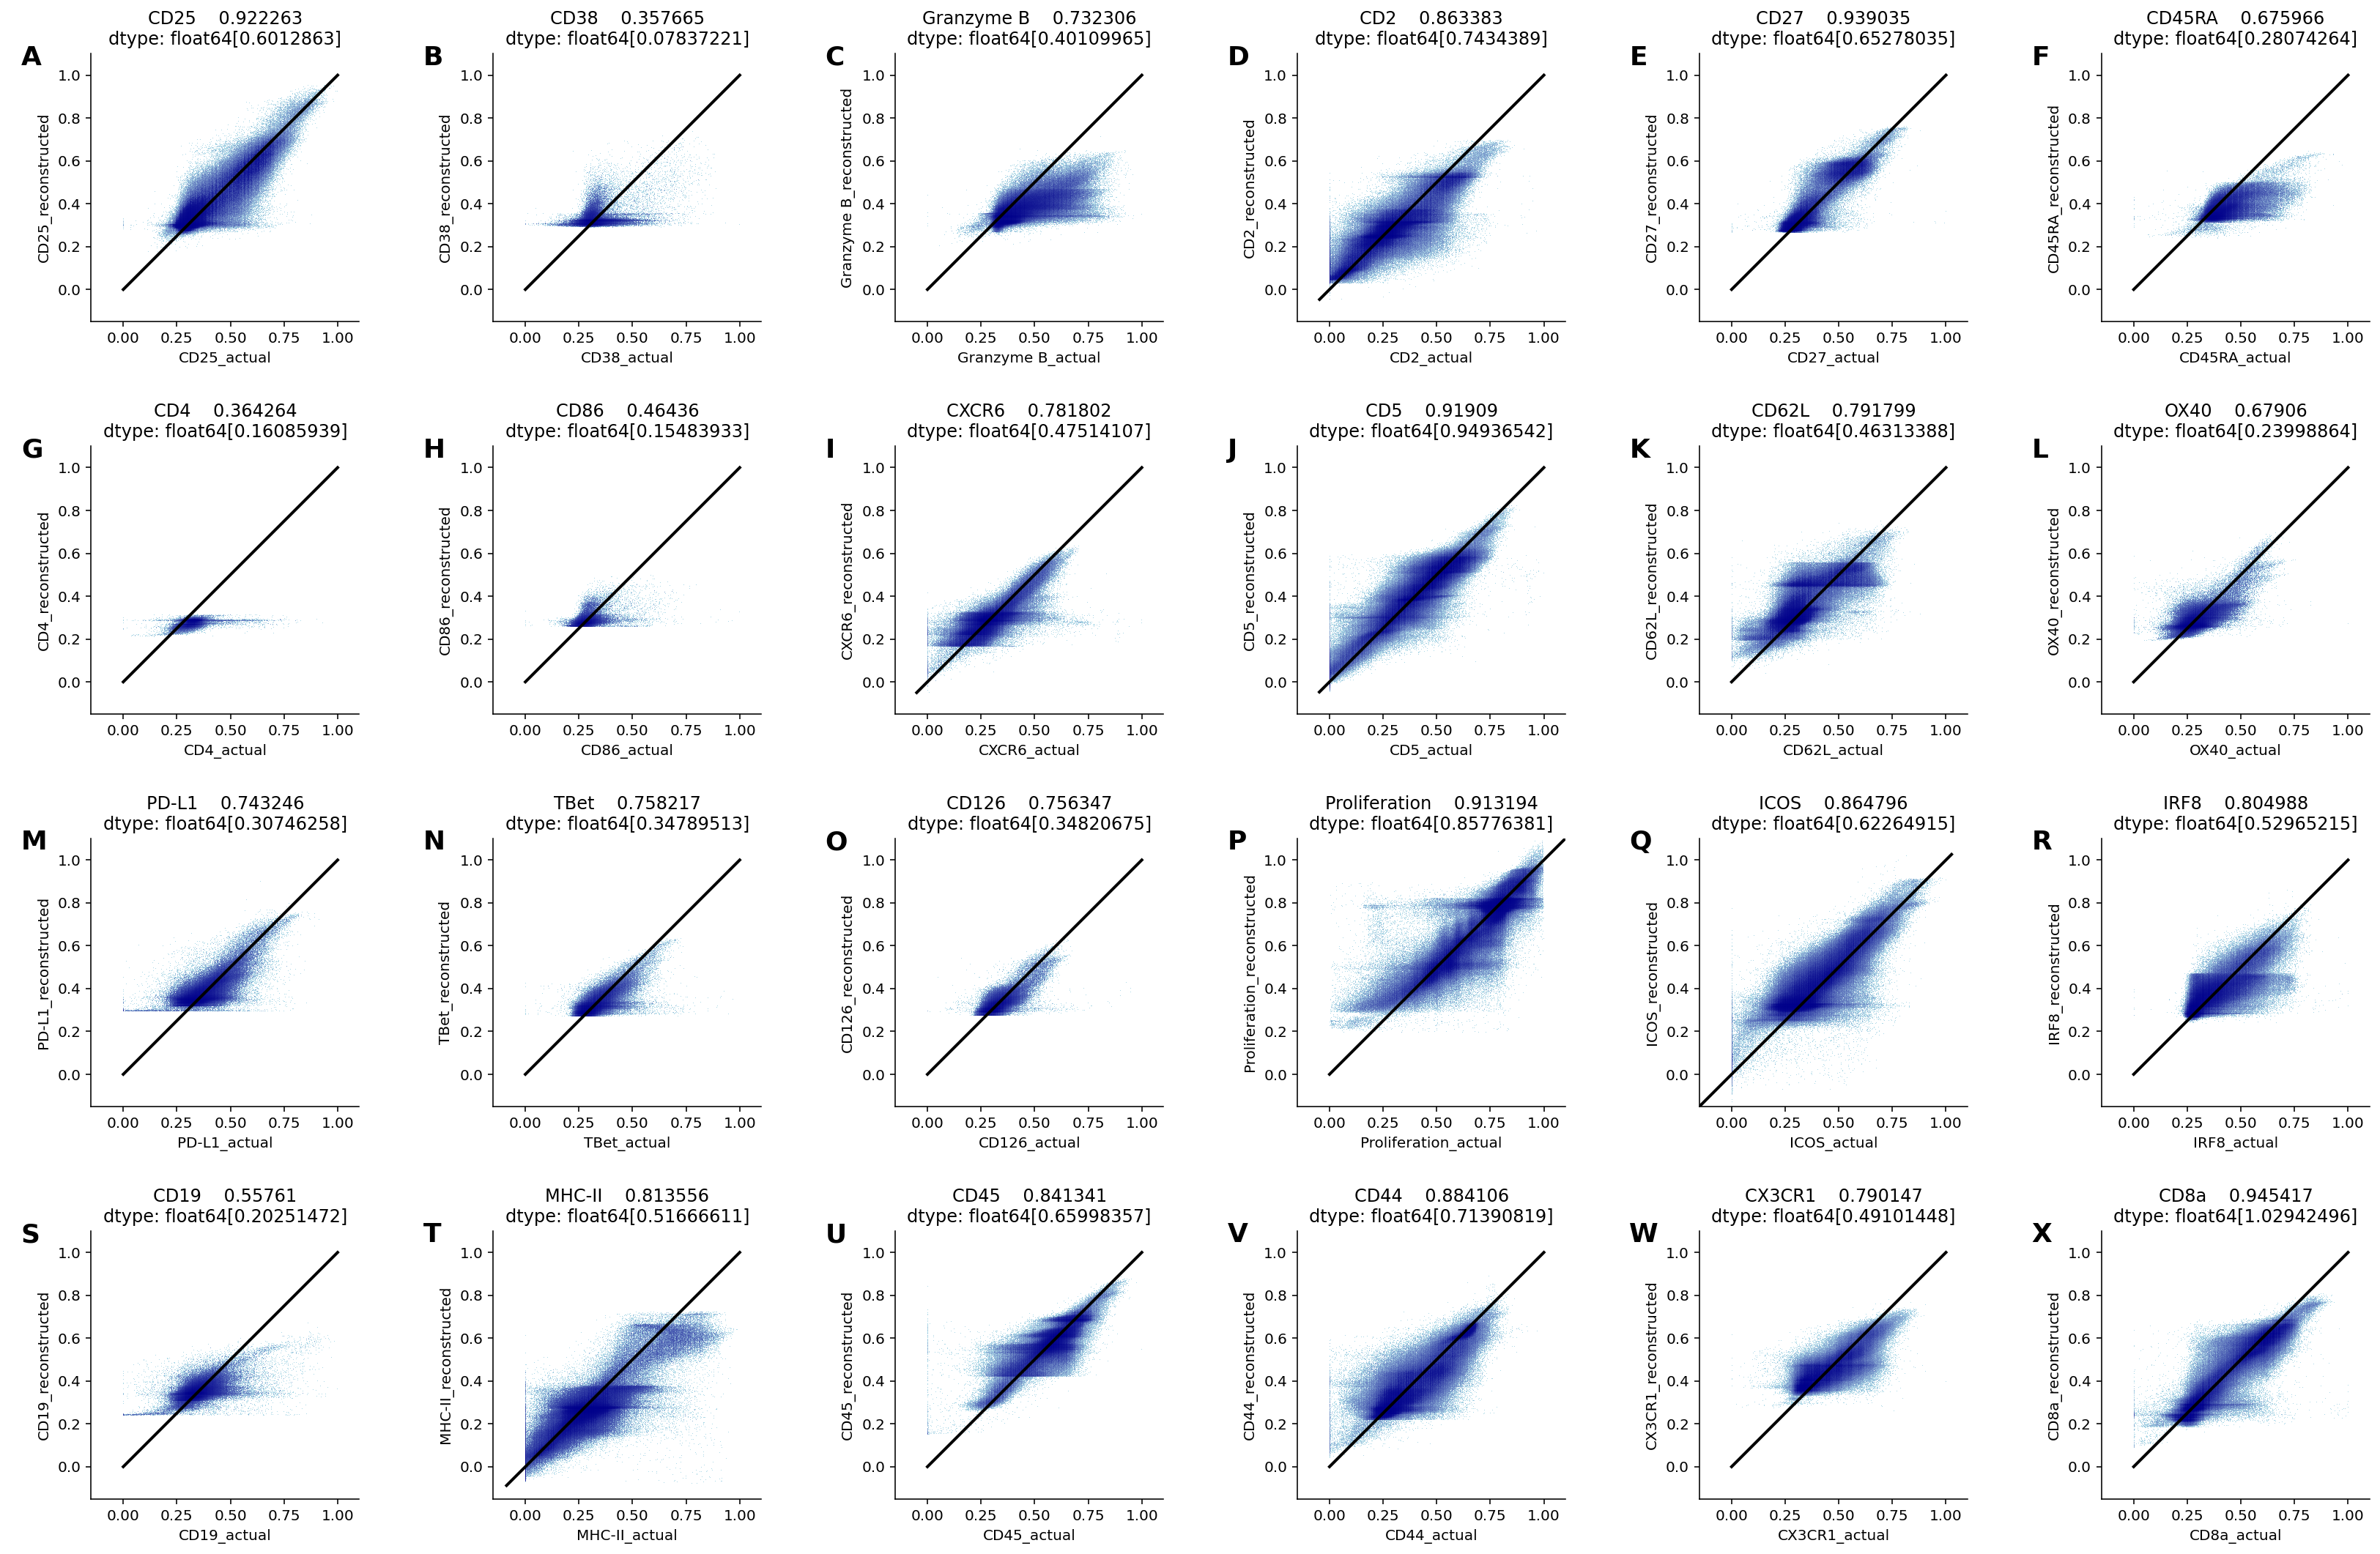

In [ ]:
import pandas as pd
import holoviews as hv
import numpy as np
from holoviews.operation.datashader import datashade
hv.extension('matplotlib')

# Assuming exp2_scaled and reconstructed_df2 are already defined
markers = exp2_scaled.columns

# Create a list to hold all the plots
plots = []

for marker in markers:
    # Prepare the DataFrame for the current marker
    df = pd.concat([exp2_scaled[[marker]], reconstructed_df2[[marker]]], axis=1)
    df.columns = [marker + "_actual", marker + "_reconstructed"]

    # Create the Points plot
    points = hv.Points(df)

    # Datashade the points plot
    shaded_points = datashade(points).opts(title=str(exp2_scaled[[marker]].corrwith(reconstructed_df2[[marker]]))+str(mutual_info[marker]), xlabel=f'{marker}_actual', ylabel=f'{marker}_reconstructed')

    # Determine the range for the diagonal line
    min_val = min(df.min())
    max_val = max(df.max())

    # Create the Diagonal Line
    diagonal = hv.Curve((np.array([min_val, max_val]), np.array([min_val, max_val]))).opts(color='black')

    # Combine the shaded points and the diagonal line
    combined_plot = shaded_points * diagonal

    # Add the combined plot to the list
    plots.append(combined_plot)

# Create a Layout of the plots in a 6x4 grid
grid = hv.Layout(plots).cols(6)
grid

In [ ]:
d_4_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_4_um_1 = d_4_um_1[d_4_um_1["Time"]==4]
d_4_um_1 = d_4_um_1.drop(["Concentration","Time"], axis = 1)

d_12_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_12_um_1 = d_12_um_1[d_12_um_1["Time"]==12]
d_12_um_1 = d_12_um_1.drop(["Concentration","Time"], axis = 1)

d_24_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_24_um_1 = d_24_um_1[d_24_um_1["Time"]==24]
d_24_um_1 = d_24_um_1.drop(["Concentration","Time"], axis = 1)

d_30_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_30_um_1 = d_30_um_1[d_30_um_1["Time"]==30]
d_30_um_1 = d_30_um_1.drop(["Concentration","Time"], axis = 1)

d_36_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_36_um_1 = d_36_um_1[d_36_um_1["Time"]==36]
d_36_um_1 = d_36_um_1.drop(["Concentration","Time"], axis = 1)

d_48_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_48_um_1 = d_48_um_1[d_48_um_1["Time"]==48]
d_48_um_1 = d_48_um_1.drop(["Concentration","Time"], axis = 1)

d_60_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_60_um_1 = d_60_um_1[d_60_um_1["Time"]==60]
d_60_um_1 = d_60_um_1.drop(["Concentration","Time"], axis = 1)

d_72_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_72_um_1 = d_72_um_1[d_72_um_1["Time"]==72]
d_72_um_1 = d_72_um_1.drop(["Concentration","Time"], axis = 1)

d_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_um_1 = d_um_1.drop(["Concentration","Time"], axis = 1)

In [ ]:
d_4_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_4_um_2 = d_4_um_2[d_4_um_2["Time"]==4]
d_4_um_2 = d_4_um_2.drop(["Concentration","Time"], axis = 1)

d_12_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_12_um_2 = d_12_um_2[d_12_um_2["Time"]==12]
d_12_um_2 = d_12_um_2.drop(["Concentration","Time"], axis = 1)

d_24_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_24_um_2 = d_24_um_2[d_24_um_2["Time"]==24]
d_24_um_2 = d_24_um_2.drop(["Concentration","Time"], axis = 1)

d_30_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_30_um_2 = d_30_um_2[d_30_um_2["Time"]==30]
d_30_um_2 = d_30_um_2.drop(["Concentration","Time"], axis = 1)

d_36_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_36_um_2 = d_36_um_2[d_36_um_2["Time"]==36]
d_36_um_2 = d_36_um_2.drop(["Concentration","Time"], axis = 1)

d_48_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_48_um_2 = d_48_um_2[d_48_um_2["Time"]==48]
d_48_um_2 = d_48_um_2.drop(["Concentration","Time"], axis = 1)

d_60_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_60_um_2 = d_60_um_2[d_60_um_2["Time"]==60]
d_60_um_2 = d_60_um_2.drop(["Concentration","Time"], axis = 1)

d_72_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_72_um_2 = d_72_um_2[d_72_um_2["Time"]==72]
d_72_um_2 = d_72_um_2.drop(["Concentration","Time"], axis = 1)

d_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_um_2 = d_um_2.drop(["Concentration","Time"], axis = 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
latent_dim = 2

1830/1830 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


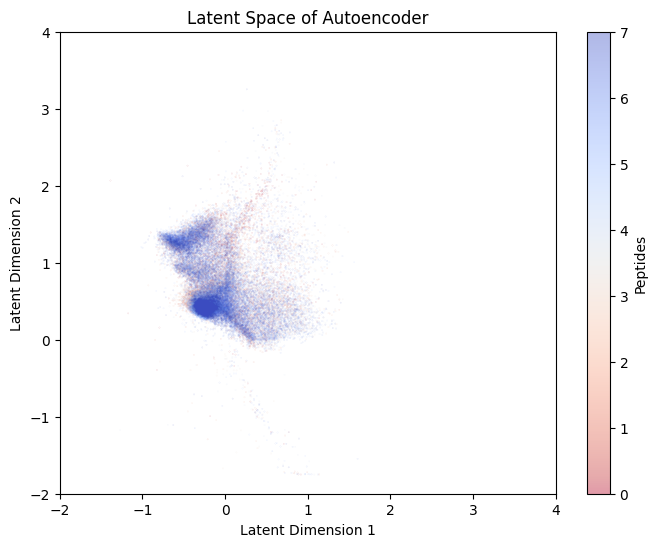

In [ ]:
%matplotlib inline
scaler = MinMaxScaler()
scaled_df_4_1 = pd.DataFrame(scaler.fit_transform(d_4_um_1.drop("Peptide", axis=1)), columns=d_4_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_4_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_4_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step


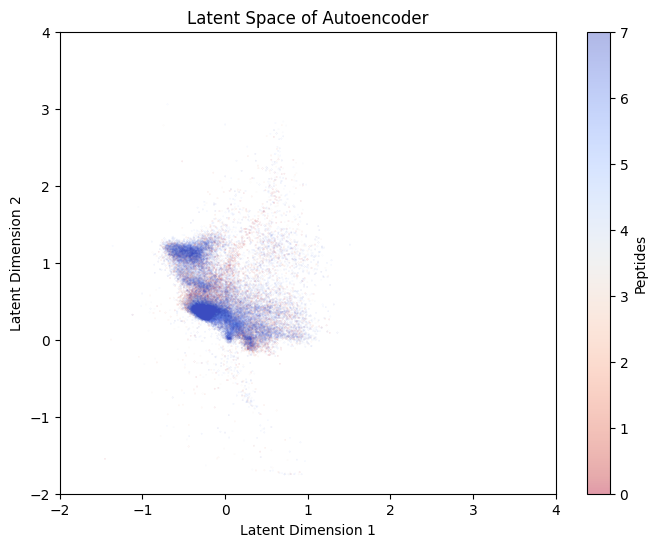

In [ ]:
%matplotlib inline
scaler = MinMaxScaler()
scaled_df_4_2 = pd.DataFrame(scaler.fit_transform(d_4_um_2.drop("Peptide", axis=1)), columns=d_4_um_2.drop("Peptide", axis=1).columns)
scaled_df_4_2

latent_space = encoder_model.predict(scaled_df_4_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_4_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step


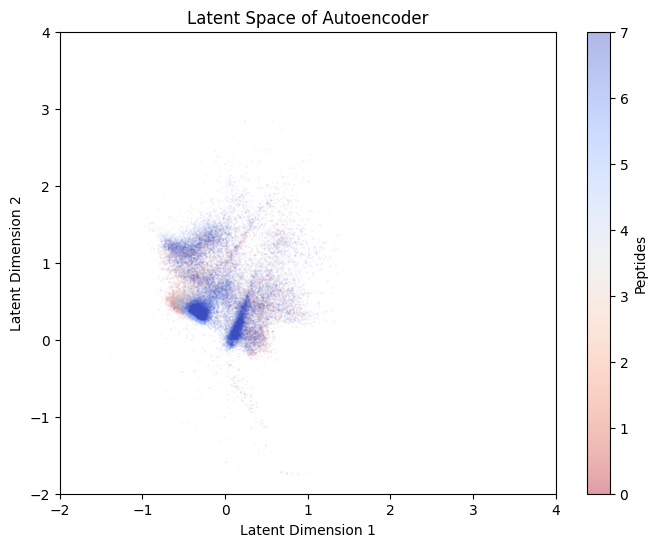

In [ ]:
scaler = MinMaxScaler()
scaled_df_12_1 = pd.DataFrame(scaler.fit_transform(d_12_um_1.drop("Peptide", axis=1)), columns=d_12_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_12_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_12_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1471/1471 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step


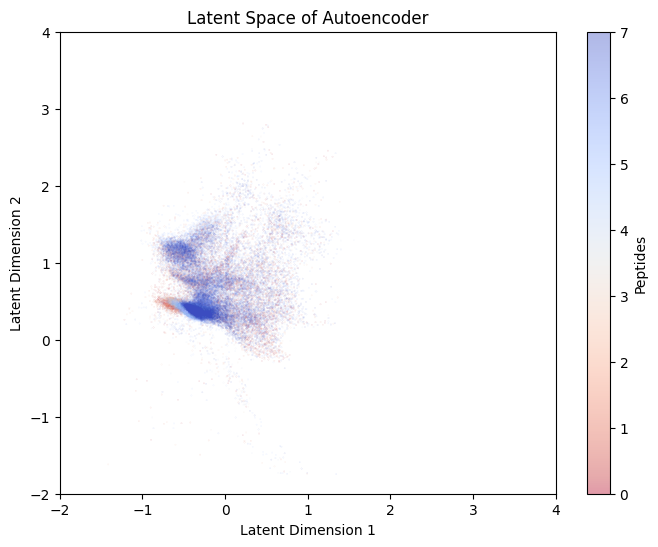

In [ ]:
scaler = MinMaxScaler()
scaled_df_12_2 = pd.DataFrame(scaler.fit_transform(d_12_um_2.drop("Peptide", axis=1)), columns=d_12_um_2.drop("Peptide", axis=1).columns)
scaled_df_12_2

latent_space = encoder_model.predict(scaled_df_12_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_12_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step


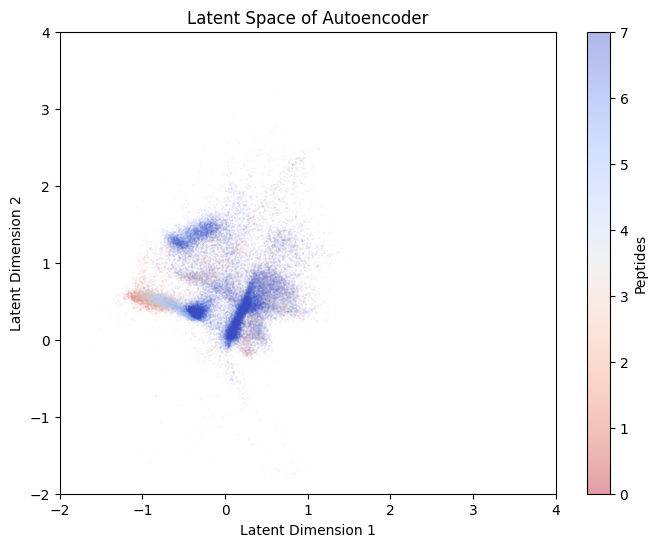

In [ ]:
scaler = MinMaxScaler()
scaled_df_24_1 = pd.DataFrame(scaler.fit_transform(d_24_um_1.drop("Peptide", axis=1)), columns=d_24_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_24_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_24_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space of Autoencoder')
plt.xlim([-2,4])
plt.ylim([-2,4])
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1733/1733 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step


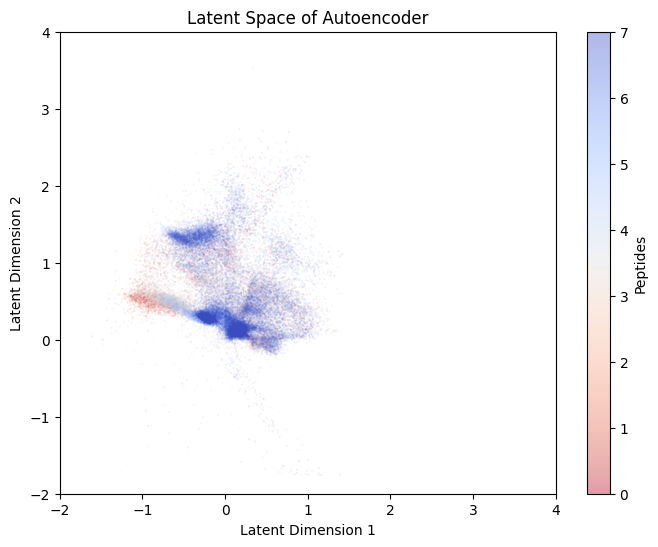

In [ ]:
scaler = MinMaxScaler()
scaled_df_24_2 = pd.DataFrame(scaler.fit_transform(d_24_um_2.drop("Peptide", axis=1)), columns=d_24_um_2.drop("Peptide", axis=1).columns)
scaled_df_24_2

latent_space = encoder_model.predict(scaled_df_24_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_24_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space of Autoencoder')
plt.xlim([-2,4])
plt.ylim([-2,4])
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1268/1268 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


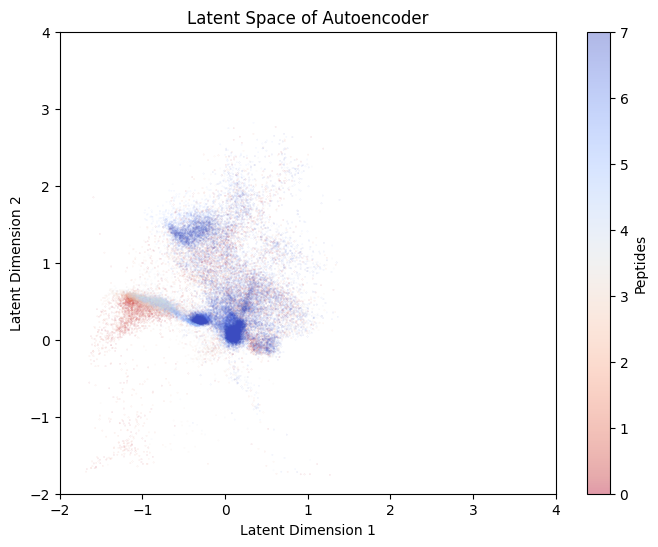

In [ ]:
scaler = MinMaxScaler()
scaled_df_30_1 = pd.DataFrame(scaler.fit_transform(d_30_um_1.drop("Peptide", axis=1)), columns=d_30_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_30_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_30_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space of Autoencoder')
plt.xlim([-2,4])
plt.ylim([-2,4])
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1923/1923 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step


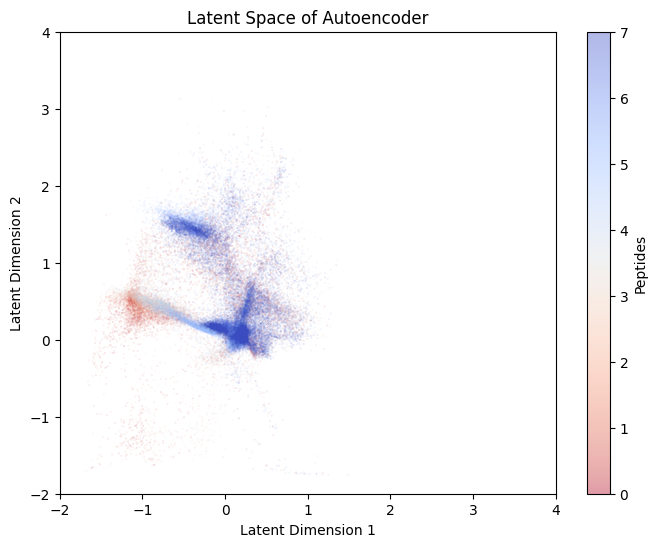

In [ ]:
scaler = MinMaxScaler()
scaled_df_30_2 = pd.DataFrame(scaler.fit_transform(d_30_um_2.drop("Peptide", axis=1)), columns=d_30_um_2.drop("Peptide", axis=1).columns)
scaled_df_30_2

latent_space = encoder_model.predict(scaled_df_30_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_30_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space of Autoencoder')
plt.xlim([-2,4])
plt.ylim([-2,4])
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

1853/1853 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step


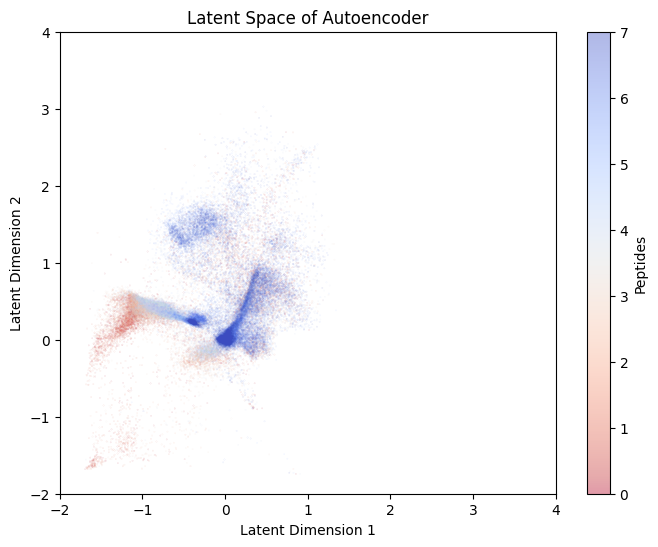

In [ ]:
scaler = MinMaxScaler()
scaled_df_36_1 = pd.DataFrame(scaler.fit_transform(d_36_um_1.drop("Peptide", axis=1)), columns=d_36_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_36_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_36_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.title('Latent Space of Autoencoder')
plt.show()

2760/2760 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step


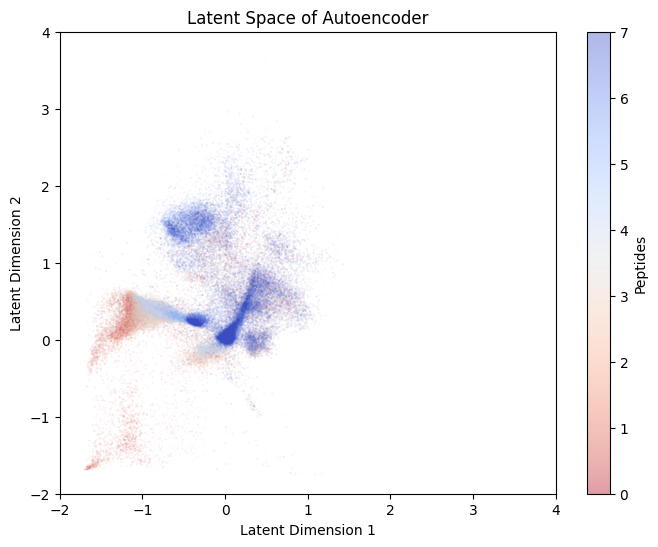

In [ ]:
scaler = MinMaxScaler()
scaled_df_36_2 = pd.DataFrame(scaler.fit_transform(d_36_um_2.drop("Peptide", axis=1)), columns=d_36_um_2.drop("Peptide", axis=1).columns)
scaled_df_36_2

latent_space = encoder_model.predict(scaled_df_36_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_36_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.title('Latent Space of Autoencoder')
plt.show()

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step


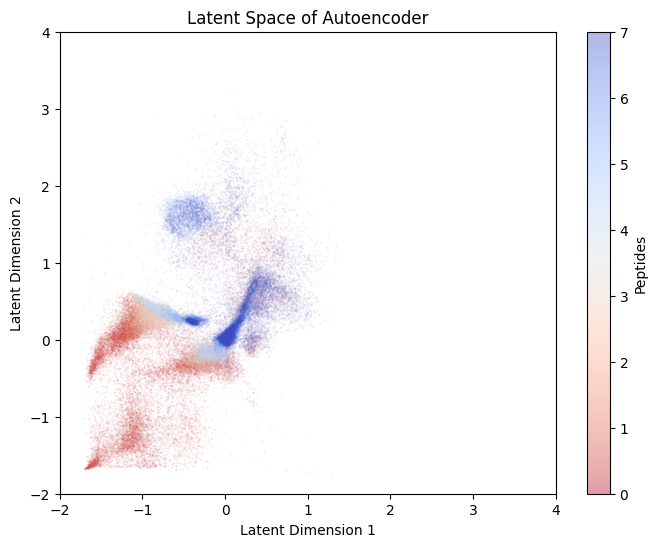

In [ ]:
scaler = MinMaxScaler()
scaled_df_48_1 = pd.DataFrame(scaler.fit_transform(d_48_um_1.drop("Peptide", axis=1)), columns=d_48_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_48_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_48_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

3571/3571 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step


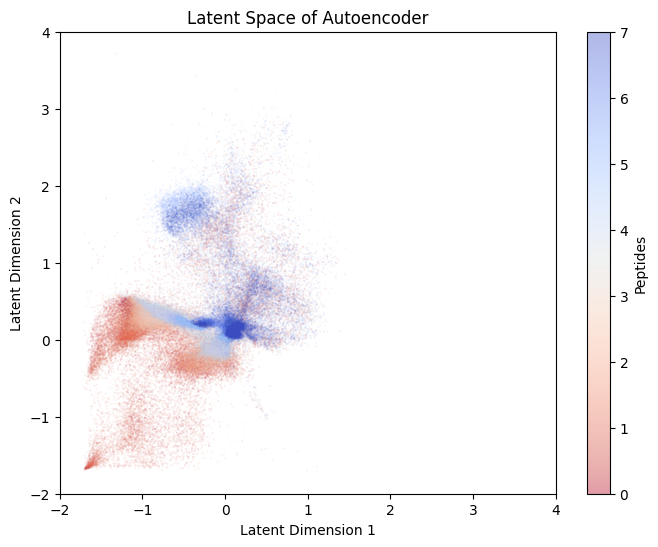

In [ ]:
scaler = MinMaxScaler()
scaled_df_48_2 = pd.DataFrame(scaler.fit_transform(d_48_um_2.drop("Peptide", axis=1)), columns=d_48_um_2.drop("Peptide", axis=1).columns)
scaled_df_48_2

latent_space = encoder_model.predict(scaled_df_48_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_48_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

6165/6165 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step


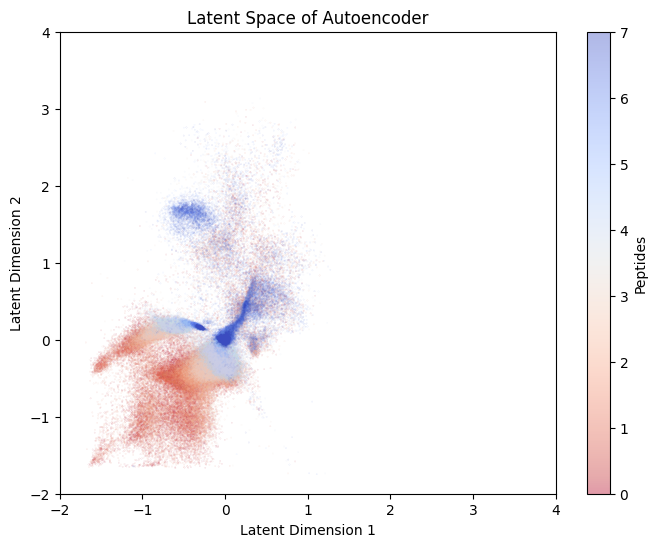

In [ ]:
scaler = MinMaxScaler()
scaled_df_60_1 = pd.DataFrame(scaler.fit_transform(d_60_um_1.drop("Peptide", axis=1)), columns=d_60_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_60_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_60_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step


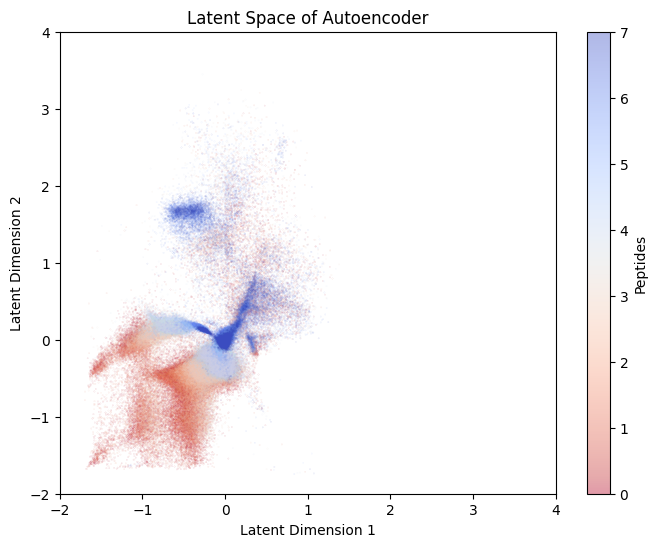

In [ ]:
scaler = MinMaxScaler()
scaled_df_60_2 = pd.DataFrame(scaler.fit_transform(d_60_um_2.drop("Peptide", axis=1)), columns=d_60_um_2.drop("Peptide", axis=1).columns)
scaled_df_60_2

latent_space = encoder_model.predict(scaled_df_60_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_60_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

4650/4650 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step


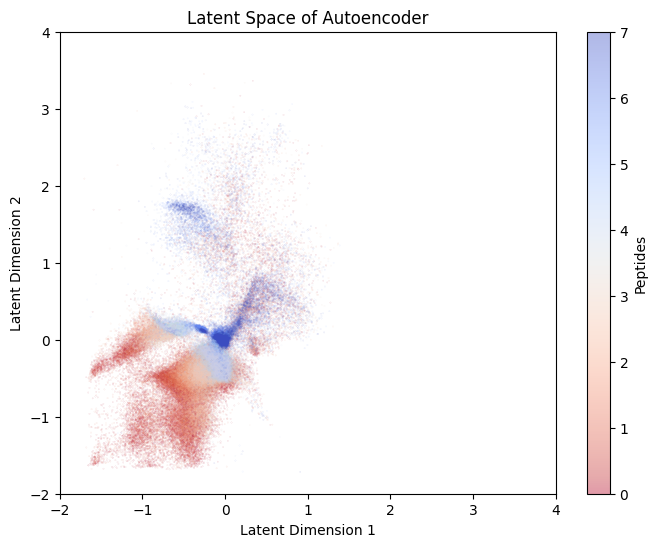

In [ ]:
scaler = MinMaxScaler()
scaled_df_72_1 = pd.DataFrame(scaler.fit_transform(d_72_um_1.drop("Peptide", axis=1)), columns=d_72_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_72_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_72_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

6568/6568 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step


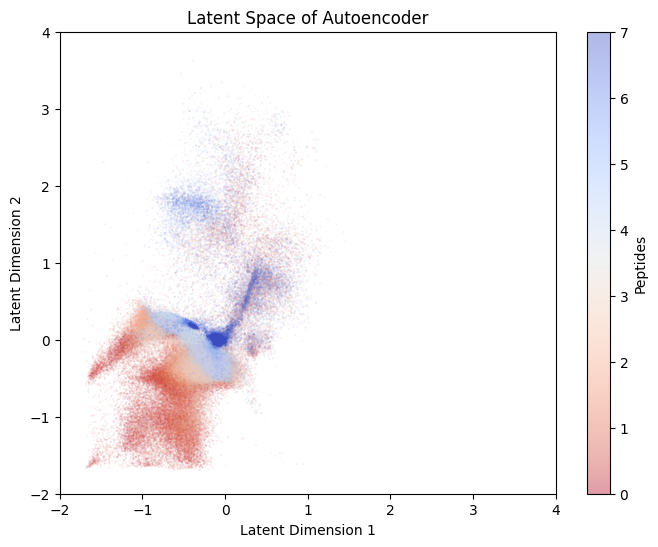

In [ ]:
scaler = MinMaxScaler()
scaled_df_72_2 = pd.DataFrame(scaler.fit_transform(d_72_um_2.drop("Peptide", axis=1)), columns=d_72_um_2.drop("Peptide", axis=1).columns)
scaled_df_72_2

latent_space = encoder_model.predict(scaled_df_72_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_72_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

21544/21544 ━━━━━━━━━━━━━━━━━━━━ 8s 362us/step


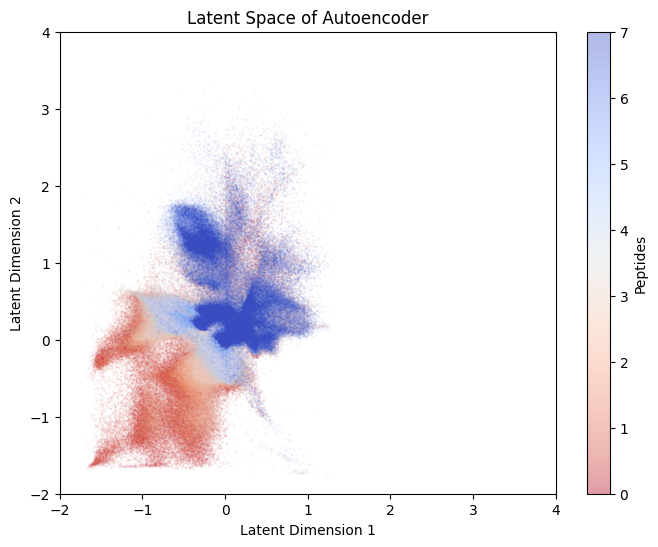

In [ ]:
%matplotlib inline
scaler = MinMaxScaler()
scaled_df_1 = pd.DataFrame(scaler.fit_transform(d_um_1.drop("Peptide", axis=1)), columns=d_um_1.drop("Peptide", axis=1).columns)

latent_space = encoder_model.predict(scaled_df_1)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_um_1["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

26204/26204 ━━━━━━━━━━━━━━━━━━━━ 9s 358us/step


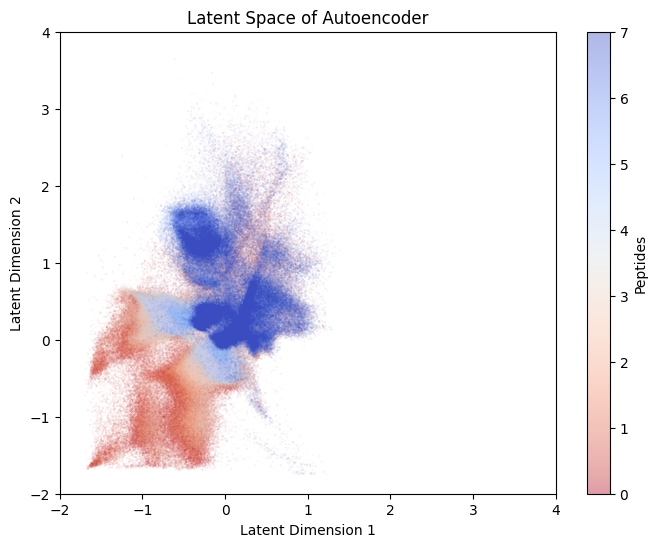

In [ ]:
%matplotlib inline
scaler = MinMaxScaler()
scaled_df_2 = pd.DataFrame(scaler.fit_transform(d_um_2.drop("Peptide", axis=1)), columns=d_um_2.drop("Peptide", axis=1).columns)
scaled_df_2

latent_space = encoder_model.predict(scaled_df_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_um_2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

26204/26204 ━━━━━━━━━━━━━━━━━━━━ 10s 362us/step


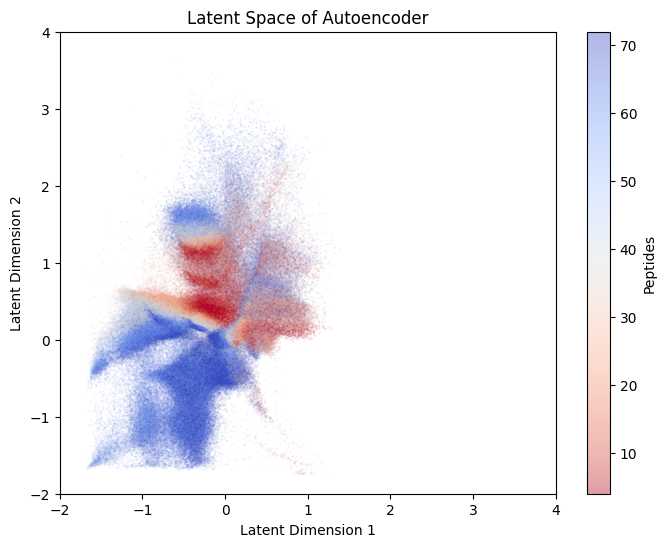

In [ ]:
%matplotlib inline

d_um_2_time = exp2[exp2["Concentration"]=="1uM"]
d_um_2_time = d_um_2_time.drop("Concentration", axis=1)
scaler = MinMaxScaler()
scaled_df_2_time = pd.DataFrame(scaler.fit_transform(d_um_2_time.drop(["Peptide","Time"], axis=1)), columns=d_um_2_time.drop(["Peptide","Time"], axis=1).columns)
scaled_df_2_time

latent_space = encoder_model.predict(scaled_df_2_time)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=d_um_2_time["Time"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

72869/72869 ━━━━━━━━━━━━━━━━━━━━ 26s 360us/step


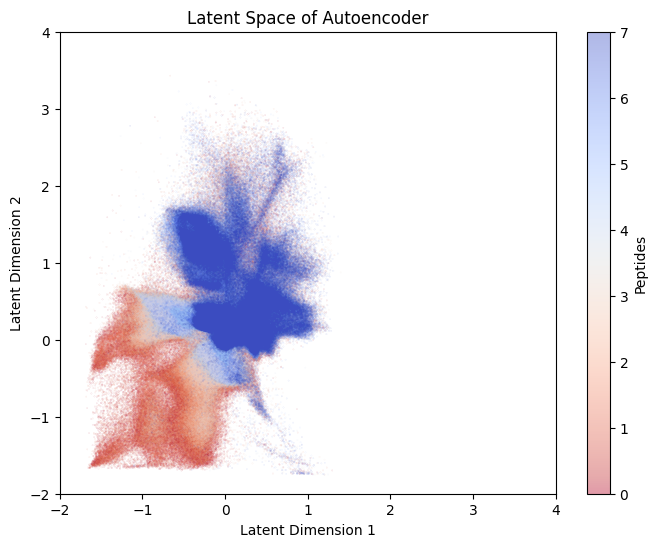

In [ ]:
latent_dim = 2
latent_space = encoder_model.predict(exp2_scaled)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=exp2["Peptide"], cmap=reversed_cmap, alpha=0.4, s=0.01)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.title('Latent Space of Autoencoder')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Peptides')
plt.show()

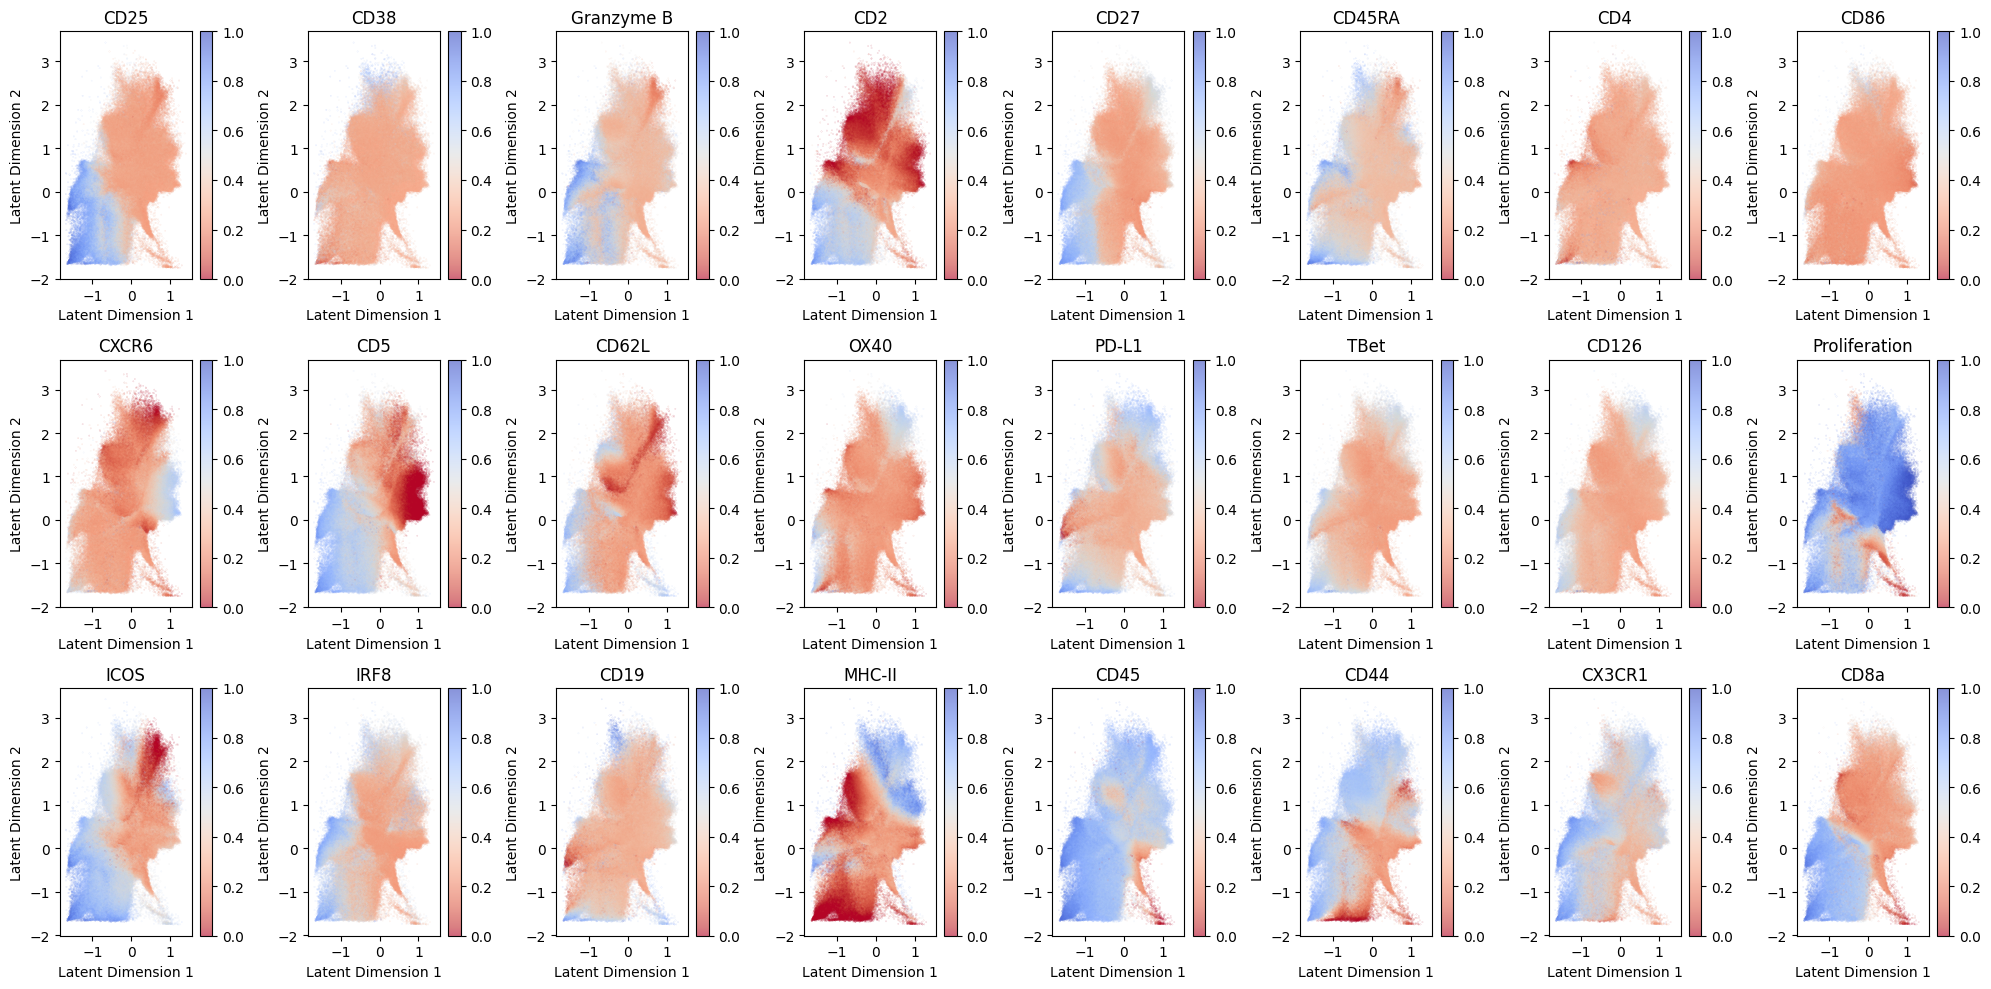

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
num_markers = exp2_scaled.shape[1]
fig, axs = plt.subplots(3, 8, figsize=(20, 10))  # Adjust grid size if needed

# Iterate over each marker to create a scatter plot
for i in range(num_markers):
    ax = axs[i // 8, i % 8]
    sc = ax.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=exp2_scaled.iloc[:,i], cmap=reversed_cmap, alpha=0.6, s=0.01)
    ax.set_title(exp2_scaled.columns[i])
    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    fig.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()


26204/26204 ━━━━━━━━━━━━━━━━━━━━ 10s 368us/step


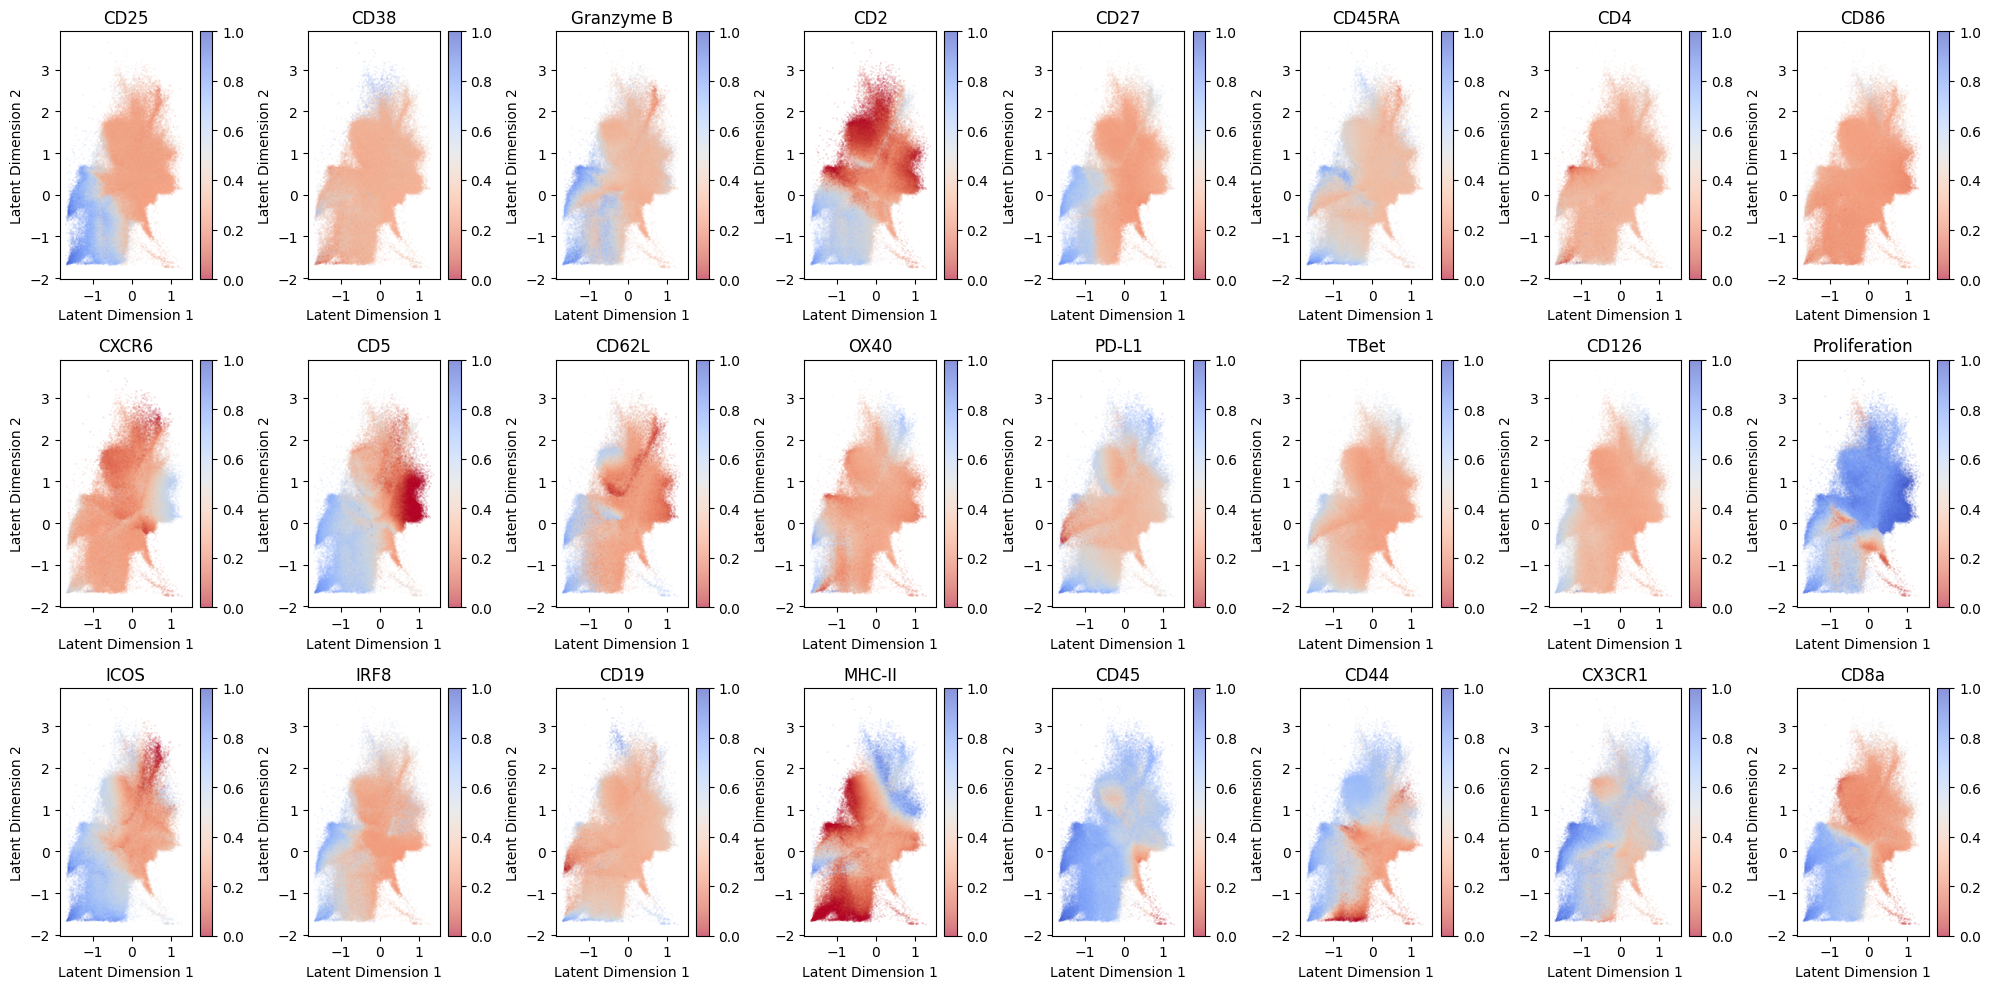

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

latent_space = encoder_model.predict(scaled_df_2)
latent_df = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

cmap = plt.get_cmap('coolwarm')
reversed_cmap = cmap.reversed()
num_markers = exp2_scaled.shape[1]
fig, axs = plt.subplots(3, 8, figsize=(20, 10))  # Adjust grid size if needed

# Iterate over each marker to create a scatter plot
for i in range(num_markers):
    ax = axs[i // 8, i % 8]
    sc = ax.scatter(latent_df.iloc[:, 0], latent_df.iloc[:, 1], c=scaled_df_2.iloc[:,i], cmap=reversed_cmap, alpha=0.6, s=0.01)
    ax.set_title(exp2_scaled.columns[i])
    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    fig.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()


In [ ]:
latent_dim=2
latent_space_train = encoder_model.predict(exp1_scaled)
latent_df_train = pd.DataFrame(latent_space_train, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

latent_space_test = encoder_model.predict(exp2_scaled)
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

61911/61911 ━━━━━━━━━━━━━━━━━━━━ 25s 398us/step
72869/72869 ━━━━━━━━━━━━━━━━━━━━ 28s 379us/step


In [ ]:
latent_df_train["Peptide"]=exp1["Peptide"].reset_index(drop =True, inplace = False)
latent_df_test["Peptide"]=exp2["Peptide"].reset_index(drop =True, inplace = False)

In [ ]:
latent_df_test

latent_dim_1  latent_dim_2  Peptide
0            0.075832     -0.332957        0
1            0.003475     -0.640926        0
2           -0.403809      0.285184        0
3           -0.529912     -1.374723        0
4            0.044394     -0.636392        0
...               ...           ...      ...
2331779      0.133248      0.067168        7
2331780      0.132214      0.105265        7
2331781      0.319773      0.420962        7
2331782     -0.016476     -0.043705        7
2331783      0.294758      0.130059        7

[2331784 rows x 3 columns]

Accuracy: 0.31
Accuracy: 0.29


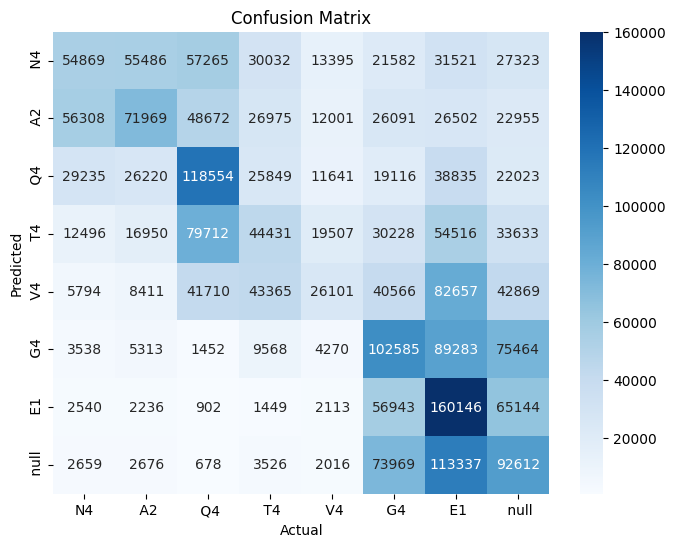

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train.drop("Peptide",axis=1), label=latent_df_train["Peptide"])
dtest = xgb.DMatrix(latent_df_test.drop("Peptide",axis=1), label=latent_df_test["Peptide"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 8,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train["Peptide"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test["Peptide"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test["Peptide"].astype(int), y_pred_test.astype(int))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N4', ' A2', ' Q4'," T4", " V4", " G4", " E1", " null"], yticklabels=[' N4', ' A2', ' Q4'," T4", " V4", " G4", " E1"," null"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(latent_df_test["Peptide"], y_pred_test))

              precision    recall  f1-score   support

           0       0.33      0.19      0.24    291473
           1       0.38      0.25      0.30    291473
           2       0.34      0.41      0.37    291473
           3       0.24      0.15      0.19    291473
           4       0.29      0.09      0.14    291473
           5       0.28      0.35      0.31    291473
           6       0.27      0.55      0.36    291473
           7       0.24      0.32      0.28    291473

    accuracy                           0.29   2331784
   macro avg       0.30      0.29      0.27   2331784
weighted avg       0.30      0.29      0.27   2331784



In [ ]:
latent_df_test

latent_dim_1  latent_dim_2  Peptide
0            0.075832     -0.332957        0
1            0.003475     -0.640926        0
2           -0.403809      0.285184        0
3           -0.529912     -1.374723        0
4            0.044394     -0.636392        0
...               ...           ...      ...
2331779      0.133248      0.067168        7
2331780      0.132214      0.105265        7
2331781      0.319773      0.420962        7
2331782     -0.016476     -0.043705        7
2331783      0.294758      0.130059        7

[2331784 rows x 3 columns]

Accuracy: 0.47
Accuracy: 0.43


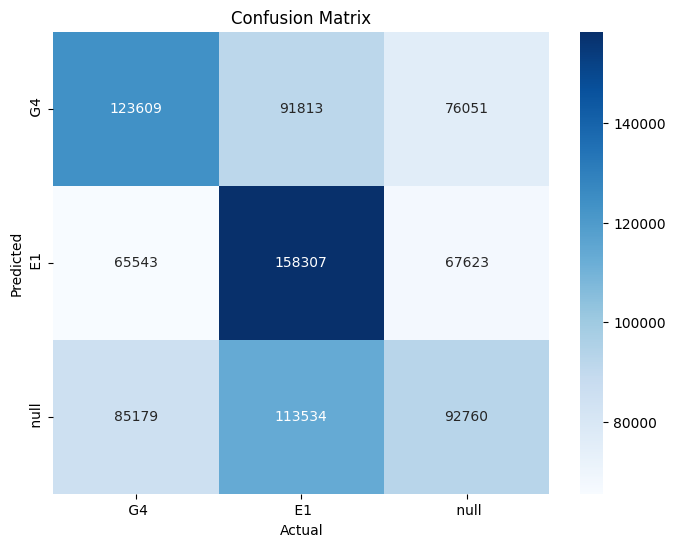

In [ ]:
import xgboost as xgb
latent_df_train_weak = latent_df_train[latent_df_train["Peptide"].isin([5, 6, 7])]
latent_df_test_weak = latent_df_test[latent_df_test["Peptide"].isin([5, 6, 7])]
for i in range(latent_df_train_weak.shape[0]):
    if latent_df_train_weak.iloc[i,2]==5:
        latent_df_train_weak.iloc[i,2]=0
    elif latent_df_train_weak.iloc[i,2]==6:
        latent_df_train_weak.iloc[i,2]=1
    else:
        latent_df_train_weak.iloc[i,2]=2

for i in range(latent_df_test_weak.shape[0]):
    if latent_df_test_weak.iloc[i,2]==5:
        latent_df_test_weak.iloc[i,2]=0
    elif latent_df_test_weak.iloc[i,2]==6:
        latent_df_test_weak.iloc[i,2]=1
    else:
        latent_df_test_weak.iloc[i,2]=2
dtrain = xgb.DMatrix(latent_df_train_weak.drop("Peptide",axis=1), label=latent_df_train_weak["Peptide"])
dtest = xgb.DMatrix(latent_df_test_weak.drop("Peptide",axis=1), label=latent_df_test_weak["Peptide"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss'
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(latent_df_train_weak["Peptide"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_weak["Peptide"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_weak["Peptide"].astype(int), y_pred_test.astype(int))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[" G4", " E1", " null"], yticklabels=[" G4", " E1"," null"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
latent_space_test = encoder_model.predict(pd.DataFrame(scaler.fit_transform(d_um_2.drop("Peptide", axis=1)), columns = d_um_2.drop("Peptide", axis=1).columns))
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

26204/26204 ━━━━━━━━━━━━━━━━━━━━ 10s 389us/step


In [ ]:
latent_df_train["Peptide"]=exp1["Peptide"].reset_index(drop =True, inplace = False)
latent_df_test["Peptide"]=d_um_2["Peptide"].reset_index(drop =True, inplace = False)

Accuracy: 0.31
Accuracy: 0.28


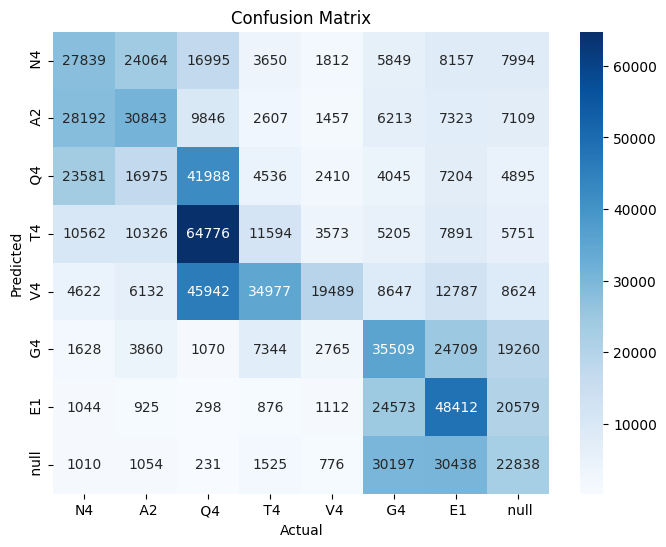

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train.drop("Peptide",axis=1), label=latent_df_train["Peptide"])
dtest = xgb.DMatrix(latent_df_test.drop("Peptide",axis=1), label=latent_df_test["Peptide"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 8,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train["Peptide"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test["Peptide"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test["Peptide"].astype(int), y_pred_test.astype(int))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N4', ' A2', ' Q4'," T4", " V4", " G4", " E1", " null"], yticklabels=[' N4', ' A2', ' Q4'," T4", " V4", " G4", " E1"," null"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test["Peptide"], y_pred_test))

              precision    recall  f1-score   support

           0       0.28      0.29      0.29     96360
           1       0.33      0.33      0.33     93590
           2       0.23      0.40      0.29    105634
           3       0.17      0.10      0.12    119678
           4       0.58      0.14      0.22    141220
           5       0.30      0.37      0.33     96145
           6       0.33      0.49      0.40     97819
           7       0.24      0.26      0.25     88069

    accuracy                           0.28    838515
   macro avg       0.31      0.30      0.28    838515
weighted avg       0.32      0.28      0.27    838515



26204/26204 ━━━━━━━━━━━━━━━━━━━━ 10s 363us/step
Accuracy: 0.47
Accuracy: 0.43


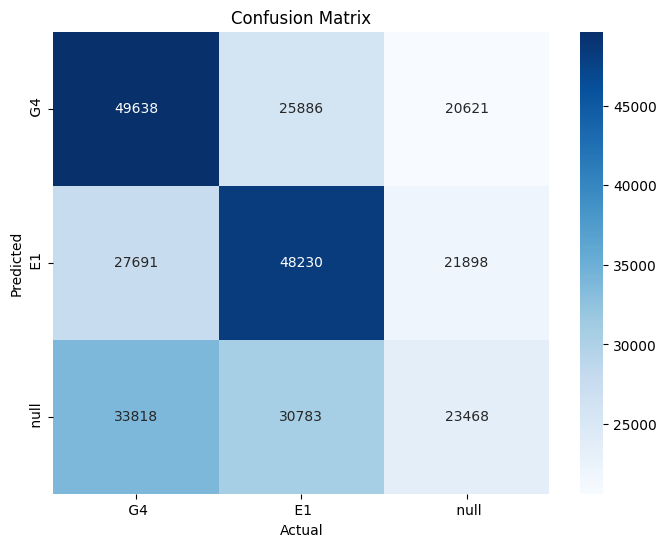

In [ ]:
latent_df_train_weak = latent_df_train[latent_df_train["Peptide"].isin([5,6,7])]
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

scaled_d_um_2 = pd.DataFrame(minmax.fit_transform(d_um_2.drop("Peptide", axis=1)), columns=d_um_2.drop("Peptide", axis=1).columns)
latent_space_test = encoder_model.predict(scaled_d_um_2)
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"]=d_um_2["Peptide"].reset_index(drop =True, inplace = False)

latent_df_test_weak = latent_df_test[latent_df_test["Peptide"].isin([5,6,7])]

for i in range(latent_df_train_weak.shape[0]):
    if latent_df_train_weak.iloc[i,2]==5:
        latent_df_train_weak.iloc[i,2]=0
    elif latent_df_train_weak.iloc[i,2]==6:
        latent_df_train_weak.iloc[i,2]=1
    else:
        latent_df_train_weak.iloc[i,2]=2

for i in range(latent_df_test_weak.shape[0]):
    if latent_df_test_weak.iloc[i,2]==5:
        latent_df_test_weak.iloc[i,2]=0
    elif latent_df_test_weak.iloc[i,2]==6:
        latent_df_test_weak.iloc[i,2]=1
    else:
        latent_df_test_weak.iloc[i,2]=2

dtrain = xgb.DMatrix(latent_df_train_weak.drop("Peptide",axis=1), label=latent_df_train_weak["Peptide"])
dtest = xgb.DMatrix(latent_df_test_weak.drop("Peptide",axis=1), label=latent_df_test_weak["Peptide"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss'
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_weak["Peptide"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_weak["Peptide"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_weak["Peptide"].astype(int), y_pred_test.astype(int))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[" G4", " E1", " null"], yticklabels=[" G4", " E1"," null"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_weak["Peptide"], y_pred_test))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48     96145
           1       0.46      0.49      0.48     97819
           2       0.36      0.27      0.30     88069

    accuracy                           0.43    282033
   macro avg       0.42      0.43      0.42    282033
weighted avg       0.42      0.43      0.42    282033



### 0 is N4, A2 and 1 is Q4, T4, V4 and 2 is G4, E1 and null

In [ ]:
latent_space = encoder_model.predict(exp1_scaled)
latent_df_train = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
d_1um = exp2[exp2["Concentration"]=="1uM"]
minmax = MinMaxScaler()

d_1um = pd.DataFrame(scaler.fit_transform(d_1um.drop(["Time","Concentration", "Peptide"], axis=1)), columns=d_1um.drop(["Time","Concentration","Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

61911/61911 ━━━━━━━━━━━━━━━━━━━━ 22s 358us/step
26204/26204 ━━━━━━━━━━━━━━━━━━━━ 10s 398us/step


### All timepoints

In [ ]:
latent_df_train["Peptide"] = exp1["Peptide"].reset_index(drop = True, inplace = False)
latent_df_test["Peptide"] = exp2[exp2["Concentration"]=="1uM"]["Peptide"].reset_index(drop = True, inplace = False)

In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
1    366532
2    282033
0    189950
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    189950
1    189950
2    189950
Name: count, dtype: int64


Category
0    189950
1    189950
2    189950
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.69


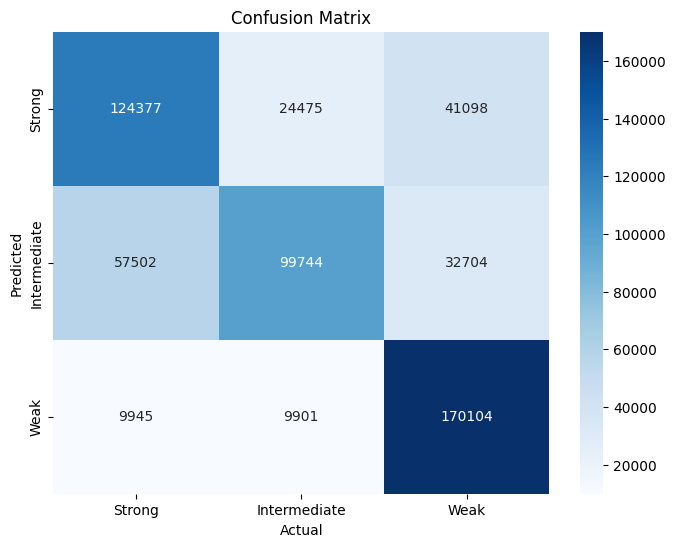

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65    189950
           1       0.74      0.53      0.62    189950
           2       0.70      0.90      0.78    189950

    accuracy                           0.69    569850
   macro avg       0.70      0.69      0.68    569850
weighted avg       0.70      0.69      0.68    569850



In [ ]:
d_4_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_4_um_2 = d_4_um_2[d_4_um_2["Time"]==4]
d_4_um_2 = d_4_um_2.drop(["Concentration","Time"], axis = 1)

d_12_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_12_um_2 = d_12_um_2[d_12_um_2["Time"]==12]
d_12_um_2 = d_12_um_2.drop(["Concentration","Time"], axis = 1)

d_24_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_24_um_2 = d_24_um_2[d_24_um_2["Time"]==24]
d_24_um_2 = d_24_um_2.drop(["Concentration","Time"], axis = 1)

d_30_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_30_um_2 = d_30_um_2[d_30_um_2["Time"]==30]
d_30_um_2 = d_30_um_2.drop(["Concentration","Time"], axis = 1)

d_36_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_36_um_2 = d_36_um_2[d_36_um_2["Time"]==36]
d_36_um_2 = d_36_um_2.drop(["Concentration","Time"], axis = 1)

d_48_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_48_um_2 = d_48_um_2[d_48_um_2["Time"]==48]
d_48_um_2 = d_48_um_2.drop(["Concentration","Time"], axis = 1)

d_60_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_60_um_2 = d_60_um_2[d_60_um_2["Time"]==60]
d_60_um_2 = d_60_um_2.drop(["Concentration","Time"], axis = 1)

d_72_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_72_um_2 = d_72_um_2[d_72_um_2["Time"]==72]
d_72_um_2 = d_72_um_2.drop(["Concentration","Time"], axis = 1)


### Timestamp 4

In [ ]:
latent_space = encoder_model.predict(exp1_scaled)
latent_df_train = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_train["Peptide"] = exp1["Peptide"].reset_index(drop = True, inplace = False)

61911/61911 ━━━━━━━━━━━━━━━━━━━━ 23s 363us/step


In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_4_um_2.drop(["Peptide"], axis=1)), columns=d_4_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_4_um_2["Peptide"].reset_index(drop = True, inplace = False)

1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
2    33283
1    12316
0     8068
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    8068
1    8068
2    8068
Name: count, dtype: int64


Category
0    8068
1    8068
2    8068
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.37


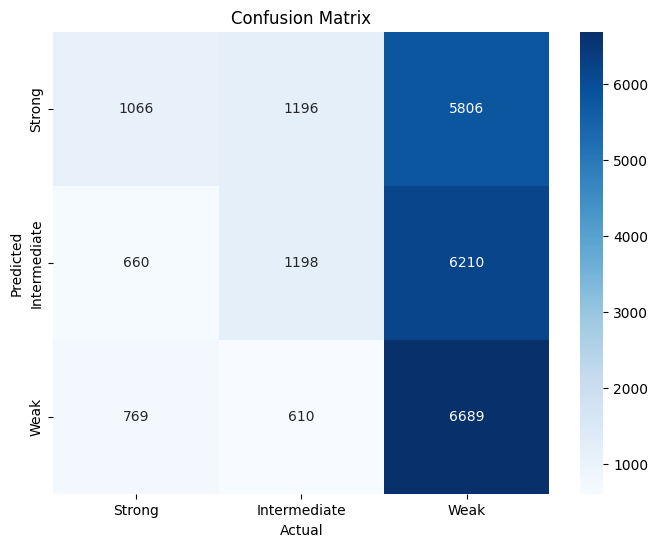

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.43      0.13      0.20      8068
           1       0.40      0.15      0.22      8068
           2       0.36      0.83      0.50      8068

    accuracy                           0.37     24204
   macro avg       0.39      0.37      0.31     24204
weighted avg       0.39      0.37      0.31     24204



### Timestamp 12

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_12_um_2.drop(["Peptide"], axis=1)), columns=d_12_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_12_um_2["Peptide"].reset_index(drop = True, inplace = False)

1471/1471 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
2    31577
1     8156
0     7330
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    7330
1    7330
2    7330
Name: count, dtype: int64


Category
0    7330
1    7330
2    7330
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.34


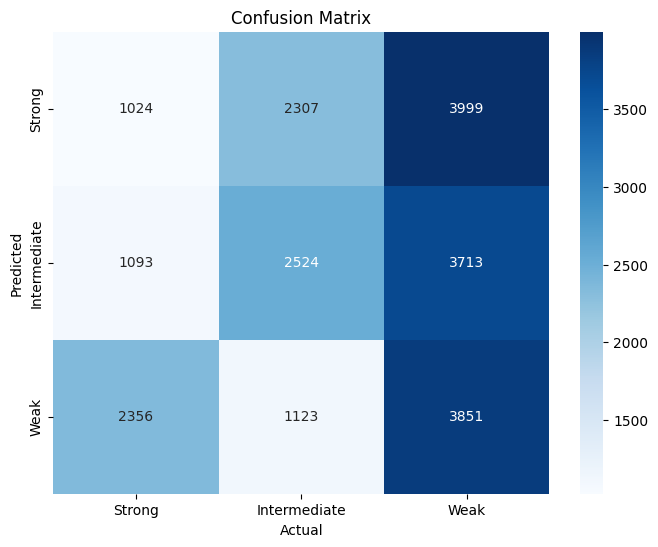

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.23      0.14      0.17      7330
           1       0.42      0.34      0.38      7330
           2       0.33      0.53      0.41      7330

    accuracy                           0.34     21990
   macro avg       0.33      0.34      0.32     21990
weighted avg       0.33      0.34      0.32     21990



### Timestamp 24

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_24_um_2.drop(["Peptide"], axis=1)), columns=d_24_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_24_um_2["Peptide"].reset_index(drop = True, inplace = False)

1733/1733 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
2    38701
1    10719
0     6024
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    6024
1    6024
2    6024
Name: count, dtype: int64


Category
0    6024
1    6024
2    6024
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.46


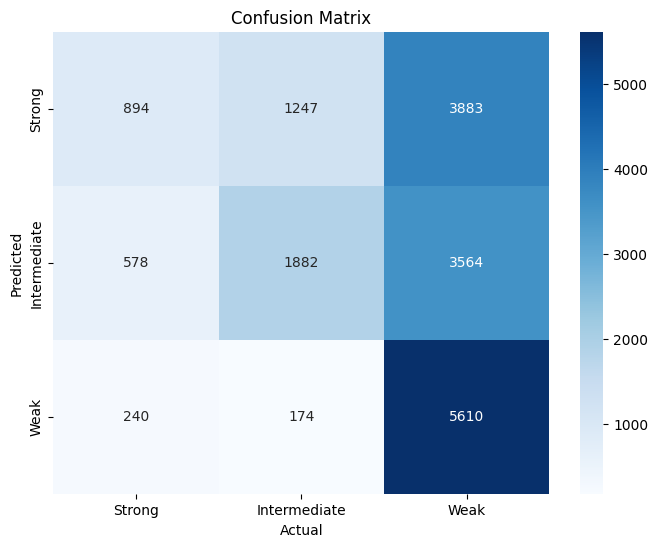

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.15      0.23      6024
           1       0.57      0.31      0.40      6024
           2       0.43      0.93      0.59      6024

    accuracy                           0.46     18072
   macro avg       0.51      0.46      0.41     18072
weighted avg       0.51      0.46      0.41     18072



### Timestamp 30

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_30_um_2.drop(["Peptide"], axis=1)), columns=d_30_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_30_um_2["Peptide"].reset_index(drop = True, inplace = False)

1923/1923 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
2    40143
1    12881
0     8502
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    8502
1    8502
2    8502
Name: count, dtype: int64


Category
0    8502
1    8502
2    8502
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.52


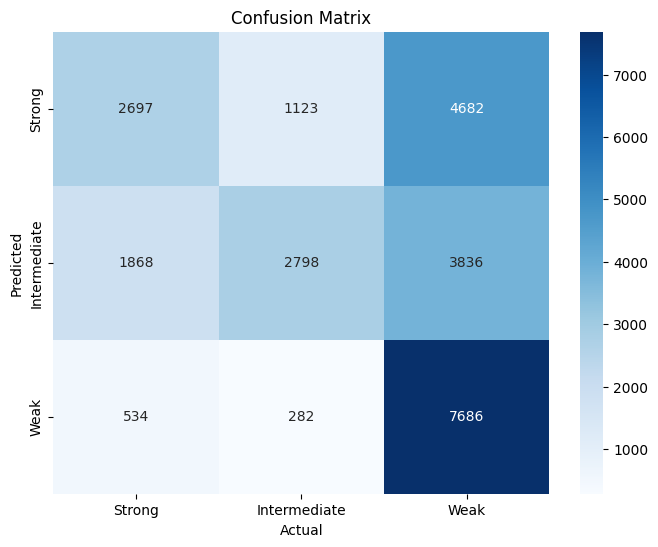

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.53      0.32      0.40      8502
           1       0.67      0.33      0.44      8502
           2       0.47      0.90      0.62      8502

    accuracy                           0.52     25506
   macro avg       0.56      0.52      0.49     25506
weighted avg       0.56      0.52      0.49     25506



### Timestamp 36

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_36_um_2.drop(["Peptide"], axis=1)), columns=d_36_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_36_um_2["Peptide"].reset_index(drop = True, inplace = False)

2760/2760 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
2    43553
1    33041
0    11698
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    11698
1    11698
2    11698
Name: count, dtype: int64


Category
0    11698
1    11698
2    11698
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.59


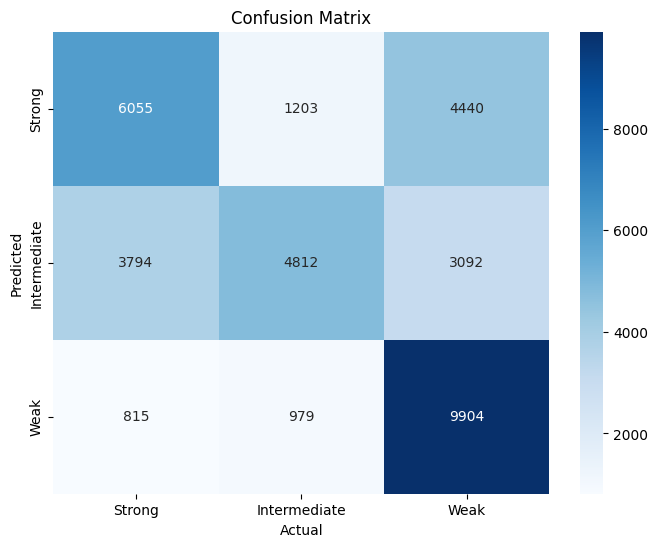

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54     11698
           1       0.69      0.41      0.51     11698
           2       0.57      0.85      0.68     11698

    accuracy                           0.59     35094
   macro avg       0.61      0.59      0.58     35094
weighted avg       0.61      0.59      0.58     35094



### Timestamp 48

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_48_um_2.drop(["Peptide"], axis=1)), columns=d_48_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_48_um_2["Peptide"].reset_index(drop = True, inplace = False)

3571/3571 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
1    54738
2    33603
0    25900
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    25900
1    25900
2    25900
Name: count, dtype: int64


Category
0    25900
1    25900
2    25900
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.66


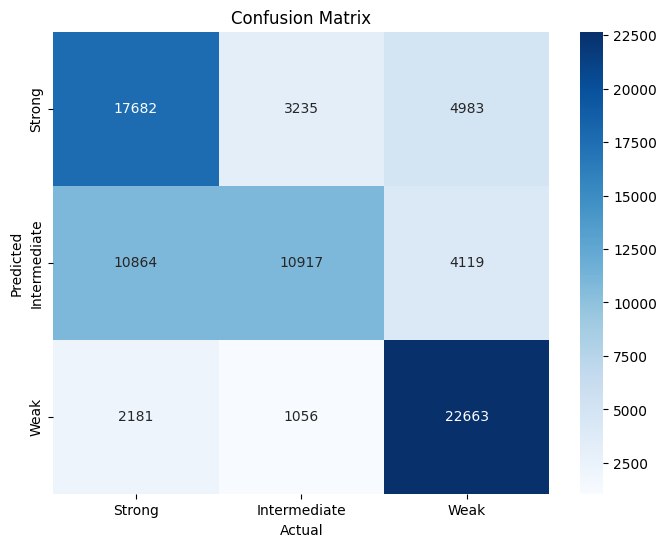

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     25900
           1       0.72      0.42      0.53     25900
           2       0.71      0.88      0.79     25900

    accuracy                           0.66     77700
   macro avg       0.67      0.66      0.65     77700
weighted avg       0.67      0.66      0.65     77700



### Timestamp 60

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_60_um_2.drop(["Peptide"], axis=1)), columns=d_60_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_60_um_2["Peptide"].reset_index(drop = True, inplace = False)

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 2s 377us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
1    117285
0     55733
2     35110
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    35110
1    35110
2    35110
Name: count, dtype: int64


Category
0    35110
1    35110
2    35110
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.71


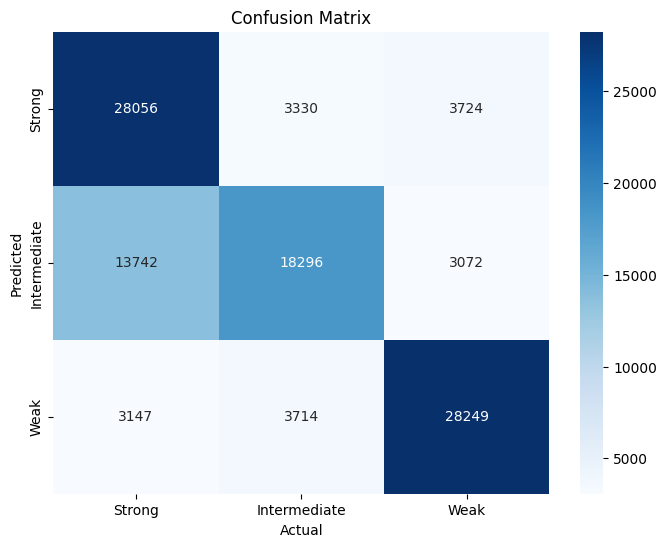

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70     35110
           1       0.72      0.52      0.61     35110
           2       0.81      0.80      0.81     35110

    accuracy                           0.71    105330
   macro avg       0.72      0.71      0.70    105330
weighted avg       0.72      0.71      0.70    105330



### Timestamp 72

In [ ]:
d_1um = pd.DataFrame(scaler.fit_transform(d_72_um_2.drop(["Peptide"], axis=1)), columns=d_72_um_2.drop(["Peptide"], axis=1).columns)
latent_space = encoder_model.predict(d_1um)
latent_df_test = pd.DataFrame(latent_space, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])
latent_df_test["Peptide"] = d_72_um_2["Peptide"].reset_index(drop = True, inplace = False)

6568/6568 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step


In [ ]:
new_class = []
for i in range(latent_df_train.shape[0]):
    if latent_df_train.iloc[i,2]==0 or latent_df_train.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_train.iloc[i,2]==2 or latent_df_train.iloc[i,2]==3 or latent_df_train.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_train["Category"]=new_class
latent_df_train["Category"].value_counts()

Category
1    742923
2    742923
0    495282
Name: count, dtype: int64

In [ ]:
new_class = []
for i in range(latent_df_test.shape[0]):
    if latent_df_test.iloc[i,2]==0 or latent_df_test.iloc[i,2]==1:
        new_class.append(0)
    elif latent_df_test.iloc[i,2]==2 or latent_df_test.iloc[i,2]==3 or latent_df_test.iloc[i,2]==4:
        new_class.append(1)
    else:
        new_class.append(2)


In [ ]:
latent_df_test["Category"]=new_class
latent_df_test["Category"].value_counts()

Category
1    117396
0     66695
2     26063
Name: count, dtype: int64

In [ ]:
latent_df_train_cat = latent_df_train.drop("Peptide", axis=1)
latent_df_test_cat = latent_df_test.drop("Peptide", axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_train_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_train_cat['Category'].unique():
    class_data = latent_df_train_cat[latent_df_train_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_train_cat = downsampled_data
latent_df_train_cat['Category'].value_counts()

Category
0    495282
1    495282
2    495282
Name: count, dtype: int64


Category
0    495282
1    495282
2    495282
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = latent_df_test_cat['Category'].value_counts().min()

downsampled_data = []

for label in latent_df_test_cat['Category'].unique():
    class_data = latent_df_test_cat[latent_df_test_cat['Category'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Category'].value_counts())
latent_df_test_cat = downsampled_data
latent_df_test_cat['Category'].value_counts()

Category
0    26063
1    26063
2    26063
Name: count, dtype: int64


Category
0    26063
1    26063
2    26063
Name: count, dtype: int64

Accuracy: 0.63
Accuracy: 0.62


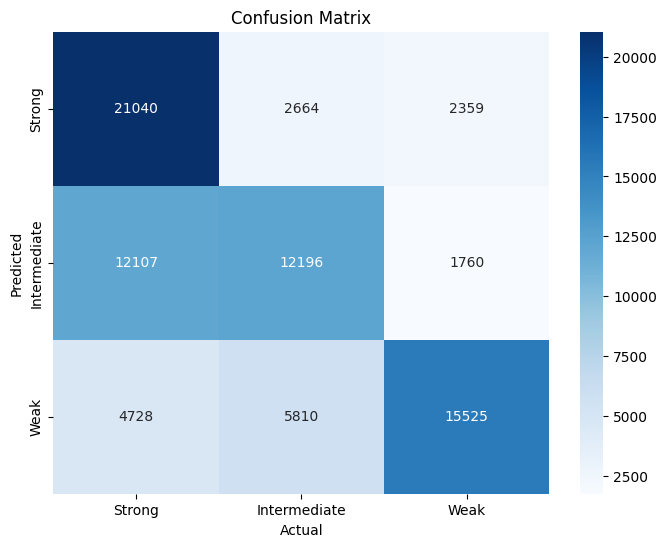

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(latent_df_train_cat.drop("Category",axis=1), label=latent_df_train_cat["Category"])
dtest = xgb.DMatrix(latent_df_test_cat.drop("Category",axis=1), label=latent_df_test_cat["Category"])
params = {
    'max_depth': 12,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 3,  # Number of classes in the target
    'eval_metric': 'mlogloss',
    'seed':42
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(latent_df_train_cat["Category"], y_pred_train)

print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(latent_df_test_cat["Category"], y_pred_test)

print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(latent_df_test_cat["Category"], y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Strong", "Intermediate", "Weak"], yticklabels=["Strong", "Intermediate", "Weak"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(latent_df_test_cat["Category"], y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66     26063
           1       0.59      0.47      0.52     26063
           2       0.79      0.60      0.68     26063

    accuracy                           0.62     78189
   macro avg       0.65      0.62      0.62     78189
weighted avg       0.65      0.62      0.62     78189



In [ ]:
latent_space_test = encoder_model.predict(exp2_scaled)
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

decoded_labels_exp2 = encoder.decode(exp2["Peptide"].reset_index(drop =True, inplace = False))

latent_df_test["Peptide"]=decoded_labels_exp2
latent_df_test["Time"] = exp2["Time"].reset_index(drop =True, inplace = False)
latent_df_test
latent_df_test.to_csv("Data/Latent space - replicate 2 - all concentrations -2D -all markers.csv", index=False)

72869/72869 ━━━━━━━━━━━━━━━━━━━━ 27s 371us/step


In [ ]:
latent_space_test = encoder_model.predict(pd.DataFrame(scaler.fit_transform(d_um_2.drop("Peptide", axis=1)), columns = d_um_2.drop("Peptide", axis=1).columns))
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

decoded_labels_exp2 = encoder.decode(d_um_2["Peptide"].reset_index(drop =True, inplace = False))

latent_df_test["Peptide"]=decoded_labels_exp2
latent_df_test["Time"] = exp2[exp2["Concentration"]=="1uM"]["Time"].reset_index(drop =True, inplace = False)
latent_df_test
latent_df_test.to_csv("Data/Latent space - replicate 2 - 1uM concentration -2D -all markers.csv", index=False)

26204/26204 ━━━━━━━━━━━━━━━━━━━━ 10s 374us/step


In [ ]:
latent_space_test = encoder_model.predict(exp1_scaled)
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

decoded_labels_exp1 = encoder.decode(exp1["Peptide"].reset_index(drop =True, inplace = False))

latent_df_test["Peptide"]=decoded_labels_exp1
latent_df_test["Time"] = exp1["Time"].reset_index(drop =True, inplace = False)
latent_df_test
latent_df_test.to_csv("Data/Latent space - replicate 1 - all concentrations -2D -all markers.csv", index=False)

61911/61911 ━━━━━━━━━━━━━━━━━━━━ 23s 370us/step


In [ ]:
d_um_1 = exp1[exp1["Concentration"]=="1uM"]

latent_space_test = encoder_model.predict(pd.DataFrame(scaler.fit_transform(d_um_1.drop(["Peptide","Time", "Concentration"], axis=1)), columns = d_um_1.drop(["Peptide","Time","Concentration"], axis=1).columns))
latent_df_test = pd.DataFrame(latent_space_test, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])


decoded_labels_exp1 = encoder.decode(d_um_1["Peptide"].reset_index(drop =True, inplace = False))

latent_df_test["Peptide"]=decoded_labels_exp1
latent_df_test["Time"] = exp1[exp1["Concentration"]=="1uM"]["Time"].reset_index(drop =True, inplace = False)
latent_df_test

latent_df_test.to_csv("Data/Latent space - replicate 1 - 1uM concentration -2D -all markers.csv", index=False)

21544/21544 ━━━━━━━━━━━━━━━━━━━━ 8s 369us/step
